<img src="http://yqsigo.com/wp-content/uploads/2018/04/LOGO-UPS.png"/>

## Materia: Simulación 
## Profesor: Ing. Diego Quisi
## Estudiante: Luis René Panjón
# PRUEBA 1

## Importación de librerias necesarias

In [806]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import plotly as ply
import datapane as dp
import plotly.graph_objects as go
import plotly.express as px

# Carga y preprocesamiento de datasets.
## Población

In [807]:
csv_poblacion = pd.read_csv(
    './202110_Tabulados_Mercado_Laboral_CSV/1.Poblaciones.csv', encoding='latin1', sep=';', skiprows=2)
csv_poblacion = csv_poblacion.drop(
    csv_poblacion.columns[[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]], axis=1)
csv_poblacion.rename(columns ={
    'Unnamed: 0':'Encuesta','Unnamed: 1':'Periodo','Unnamed: 2':'Indicadores', 'Unnamed: 5':'Area'
    ,'Unnamed: 7':'Sexo'
}, inplace = True)


## Tasas

In [808]:
csv_tasas = pd.read_csv(
    './202110_Tabulados_Mercado_Laboral_CSV/2.Tasas.csv', encoding='latin1', sep=';', skiprows=2)
csv_tasas.rename(columns={
    'Unnamed: 0':'Encuesta','Unnamed: 1':'Periodo','Unnamed: 2':'Indicadores'
}, inplace = True)

## Empleados

In [809]:
csv_empleados = pd.read_csv(
    './202110_Tabulados_Mercado_Laboral_CSV/3.1. Caracterización empleados.csv', encoding='latin1', sep=';')
csv_empleados = pd.DataFrame(csv_empleados.to_numpy().transpose().tolist())
csv_empleados = csv_empleados.drop(csv_empleados.columns[list(range(29,63))], axis=1)
csv_empleados[0][1]="Caracteristicas"
csv_empleados = csv_empleados.drop(0)

## Adec_Pleno

In [810]:
# csv_adec_pleno = pd.read_csv(
#     './202110_Tabulados_Mercado_Laboral_CSV/3.2. Caracterización adec_pleno.csv', encoding='latin1', sep=';')
# csv_adec_pleno = pd.DataFrame(csv_adec_pleno.to_numpy().transpose().tolist())
# csv_adec_pleno[0][1]="Caracterisctas"
# csv_adec_pleno = csv_adec_pleno.drop(0)


## Subempleo

In [811]:
csv_subempleo = pd.read_csv(
    './202110_Tabulados_Mercado_Laboral_CSV/3.3. Caracterización subempleo.csv', encoding='latin1', sep=';')
csv_subempleo = pd.DataFrame(csv_subempleo.to_numpy().transpose().tolist())
csv_subempleo[0][1]="Caracteristicas"
csv_subempleo = csv_subempleo.drop(0)

## No Pleno

In [812]:
csv_no_pleno = pd.read_csv(
    './202110_Tabulados_Mercado_Laboral_CSV/3.4 Caracterización Ot. no pleno.csv', encoding='latin1', sep=';')
csv_no_pleno = pd.DataFrame(csv_no_pleno.to_numpy().transpose().tolist())
csv_no_pleno[0][1] = "Caracteristicas"
csv_no_pleno = csv_no_pleno.drop(0)

/tmp/ipykernel_10443/3823610171.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Desempleo

In [813]:
csv_desempleado = pd.read_csv(
    './202110_Tabulados_Mercado_Laboral_CSV/3.5 Caracterización Desempleo.csv', encoding='latin1', sep=';')
csv_desempleado = pd.DataFrame(csv_desempleado.to_numpy().transpose().tolist())
csv_desempleado[0][1] = "Caracteristicas"
csv_desempleado = csv_desempleado.drop(0)

## Sectorización del empleo

In [814]:
csv_sectorizacion = pd.read_csv(
    './202110_Tabulados_Mercado_Laboral_CSV/4. Sectorización del empleo.csv', encoding='latin1', sep=';', index_col=0)
csv_sectorizacion = pd.DataFrame(csv_sectorizacion.to_numpy().transpose().tolist())
csv_sectorizacion[0][0] = "Periodo"
csv_sectorizacion.columns = csv_sectorizacion.iloc[0]
csv_sectorizacion = csv_sectorizacion.drop(0)
csv_sectorizacion


,Periodo,Sector Formal,Sector Informal,Empleo Doméstico,No Clasificados por Sector,Sector Formal,Sector Informal,Empleo Doméstico,No Clasificados por Sector,Sector Formal,Sector Informal,Empleo Doméstico,No Clasificados por Sector
1,jun-07,-,-,-,-,"54,7%","36,9%","4,0%","4,4%",-,-,-,-
2,sep-07,-,-,-,-,"55,7%","36,1%","4,1%","4,1%",-,-,-,-
3,dic-07,"41,0%","45,1%","3,3%","10,6%","54,1%","34,0%","4,3%","7,7%","15,5%","66,7%","1,5%","16,3%"
4,mar-08,-,-,-,-,"54,4%","36,6%","3,9%","5,1%",-,-,-,-
5,jun-08,"42,5%","45,4%","3,3%","8,8%","55,8%","34,0%","4,0%","6,2%","16,2%","68,1%","1,8%","13,9%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,jun-21,"42,3%","49,9%","2,0%","5,8%","52,5%","38,8%","2,3%","6,3%","23,1%","70,8%","1,3%","4,8%"
62,jul-21,"40,6%","51,2%","2,1%","6,2%","50,7%","40,5%","2,6%","6,2%","21,2%","71,6%","1,1%","6,1%"
63,ago-21,"41,2%","50,6%","2,4%","5,8%","52,1%","39,6%","3,1%","5,3%","21,0%","71,2%","1,0%","6,7%"
64,sep-21,"43,9%","49,2%","2,4%","4,5%","54,3%","37,9%","3,0%","4,8%","24,9%","69,9%","1,3%","3,9%"


## Desarrollo

<ul>
  <li>Generar graficas para entender y procesar los datos:</li>
  <ul>
    <li>Generar graficas y reportes del total de personas empleadas y desempleadas por año.</li>
    <li>Generar grafico de pie por personas basadas en la sectorización de empleo.</li>
    <li>Generar histogramas subempleo, empleo pleno y empleo no pleno por año.</li>
  </ul>
</ul>

In [815]:
init = input('Ingrese fecha de inicio')
end = input('Ingrese fecha de fin')

In [816]:
## fn para eliminación de puntos 
def replacePoint(x):
  return int(x.replace(".",""))
## Eliminación de puntos en la columna de TOTAL
csv_poblacion.Total = csv_poblacion.Total.apply(replacePoint)
csv_pie = csv_poblacion.copy()

In [817]:

## fn para obtener únicamente año
def getOnlyYear(x): 
  return x.split('-')[1]
## Obtener únicamente el año 
csv_poblacion.Periodo = csv_poblacion.Periodo.apply(getOnlyYear)


In [818]:
csv_poblacion.head(5)

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
0,ENEMDU,07,Población Total,13682302,9.066.209,4.616.093,6.768.646,6.913.656
1,ENEMDU,07,Población menor de 15 años,4372812,2.723.124,1.649.688,2.226.618,2.146.194
2,ENEMDU,07,Población en Edad de Trabajar (PET),9309490,6.343.085,2.966.404,4.542.028,4.767.462
3,ENEMDU,07,Población Económicamente Activa,6336029,4.227.702,2.108.328,3.777.232,2.558.798
4,ENEMDU,07,Empleo,6019332,3.971.040,2.048.292,3.632.314,2.387.018


In [819]:
## Reducir datase a solo columnas de interes: Periodo, Indicador y Total
csv_poblacion = csv_poblacion[['Periodo','Indicadores','Total']].groupby(['Periodo','Indicadores'],as_index=False).mean()
csv_other_employes = csv_poblacion.query('Indicadores=="Subempleo" | Indicadores=="Empleo Adecuado/Pleno" | Indicadores=="Otro Empleo no pleno"')
csv_sub_empleo= csv_other_employes.query('Indicadores=="Subempleo"')
csv_empleo_pleno= csv_other_employes.query('Indicadores=="Empleo Adecuado/Pleno"')
csv_empleo_nopleno= csv_other_employes.query('Indicadores=="Otro Empleo no pleno"')
csv_poblacion.head(5)

,Periodo,Indicadores,Total
0,07,Desempleo,316697.0
1,07,Desempleo Abierto,193225.0
2,07,Desempleo Cesante,190044.0
3,07,Desempleo Nuevo,126653.0
4,07,Desempleo Oculto,123472.0


In [820]:
## Obtener unicamente los datos con el Indicador de Empleado y Desempleado
csv_poblacion = csv_poblacion.query('Indicadores=="Empleo" | Indicadores=="Desempleo"')
csv_poblacion.head(5)

,Periodo,Indicadores,Total
0,07,Desempleo,316697.0
5,07,Empleo,6019332.0
18,08,Desempleo,362084.5
23,08,Empleo,6125310.0
36,09,Desempleo,423802.0


## GRÁFICA DE EMPLEADOS POR AÑO

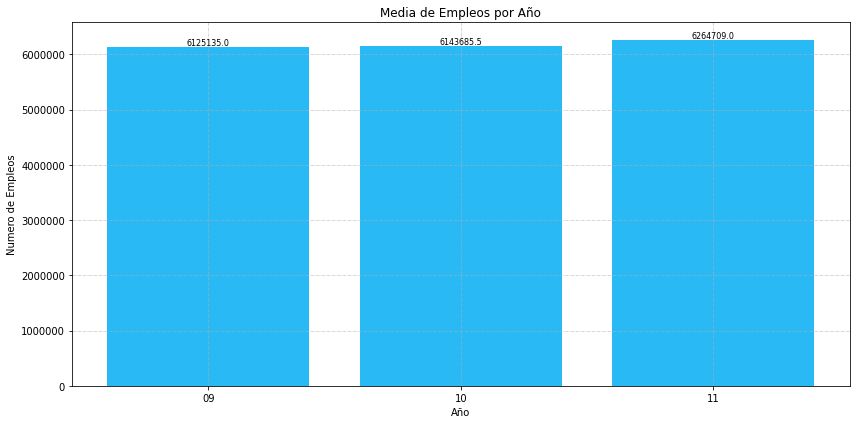

In [821]:
arr_employes = csv_poblacion.query('Indicadores == "Empleo" ')
arr_unemployes = csv_poblacion.query('Indicadores == "Desempleo"')
arr_employes = arr_employes.loc[(arr_employes['Periodo']>=init) & (arr_employes['Periodo']<=end)]
arr_unemployes = arr_unemployes.loc[(arr_unemployes['Periodo']>=init) & (arr_unemployes['Periodo']<=end)]
fig, ax = plt.subplots(figsize =(12, 6))
empleados = ax
plt.bar( arr_employes.Periodo, arr_employes.Total, color = '#29baf6')
try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print(AttributeError)
plt.title('Media de Empleos por Año')
plt.xlabel('Año')
plt.ylabel('Numero de Empleos')
plt.grid(linestyle='-.', linewidth=0.5)
for index,data in enumerate(arr_employes.Total):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=8), ha='center', va='bottom')
plt.tight_layout()
plt.show()

## GRÁFICA DE DESEMPLEADOS POR AÑO

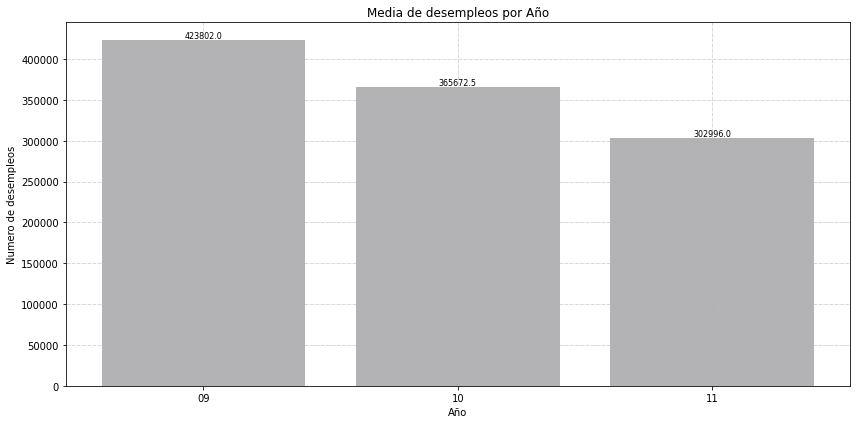

In [822]:
fig, ax = plt.subplots(figsize =(12, 6))
desempleos = ax
plt.bar( arr_unemployes.Periodo, arr_unemployes.Total, color = '#b3b3b5')
try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print(AttributeError)
plt.title('Media de desempleos por Año')
plt.xlabel('Año')
plt.ylabel('Numero de desempleos')
plt.grid(linestyle='-.', linewidth=0.5)
for index,data in enumerate(arr_unemployes.Total):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=8), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [823]:
csv_pie

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
0,ENEMDU,dic-07,Población Total,13682302,9.066.209,4.616.093,6.768.646,6.913.656
1,ENEMDU,dic-07,Población menor de 15 años,4372812,2.723.124,1.649.688,2.226.618,2.146.194
2,ENEMDU,dic-07,Población en Edad de Trabajar (PET),9309490,6.343.085,2.966.404,4.542.028,4.767.462
3,ENEMDU,dic-07,Población Económicamente Activa,6336029,4.227.702,2.108.328,3.777.232,2.558.798
4,ENEMDU,dic-07,Empleo,6019332,3.971.040,2.048.292,3.632.314,2.387.018
...,...,...,...,...,...,...,...,...
895,ENEMDU*,oct-21,Desempleo Abierto,336101,291.606,44.495,150.276,185.824
896,ENEMDU*,oct-21,Desempleo Oculto,48103,27.600,20.503,25.975,22.128
897,ENEMDU*,oct-21,Desempleo Cesante,298846,257.856,40.991,140.223,158.623
898,ENEMDU*,oct-21,Desempleo Nuevo,85358,61.351,24.007,36.028,49.330


## Sectorización de empleo.

In [824]:
def sectorizacion(df_period):
  df_es_res = df_period.groupby(['Periodo', 'Indicadores'], as_index=False)['Total'].mean()
  df_es_res.rename(columns ={
    'Indicadores':'Sector'
  }, inplace = True)
  es_fig = px.pie(df_es_res, values='Total', names='Sector', title='Sectorización de Empleo')
  es_fig.show()
  return es_fig, df_es_res

def pie(init='07', end='21'):
  try:
    df_pie2 = csv_pie.copy()
    df_pie2['Periodo'] = df_pie2['Periodo'].str[-2:]
    df_pie2 = df_pie2.loc[(df_pie2['Periodo']>=init) & (df_pie2['Periodo']<=end)]
    es_fig, df_es_res = sectorizacion(df_pie2)
    report = dp.Report(dp.Text("""## Descripción de datos"""), dp.Table(csv_pie.describe()) ,dp.Plot(empleados),dp.Plot(desempleos), dp.Text("""## Sectorización de Empleo"""), dp.Plot(es_fig))
    file_name = "report-"+init+end+".html"
    report.save(path=file_name,open=True)
  except:
    print("Error rango de años invalido rangos permitidos desde 07 hasta el 21")

In [825]:
pie(init, end)

Report saved to ./report-0911.html. To upload and share your report, create a free Datapane account by running `!datapane signup`.

How is your experience of Datapane? Please take two minutes to answer our anonymous [product survey](https://bit.ly/3lWjRlr)

## Histograma Subempleo, Empleo pleno y Empleo no pleno por año

[1204/162234.052062:ERROR:file_io_posix.cc(207)] open /home/rene/.config/Code/exthost Crash Reports/settings.dat: Permission denied (13)


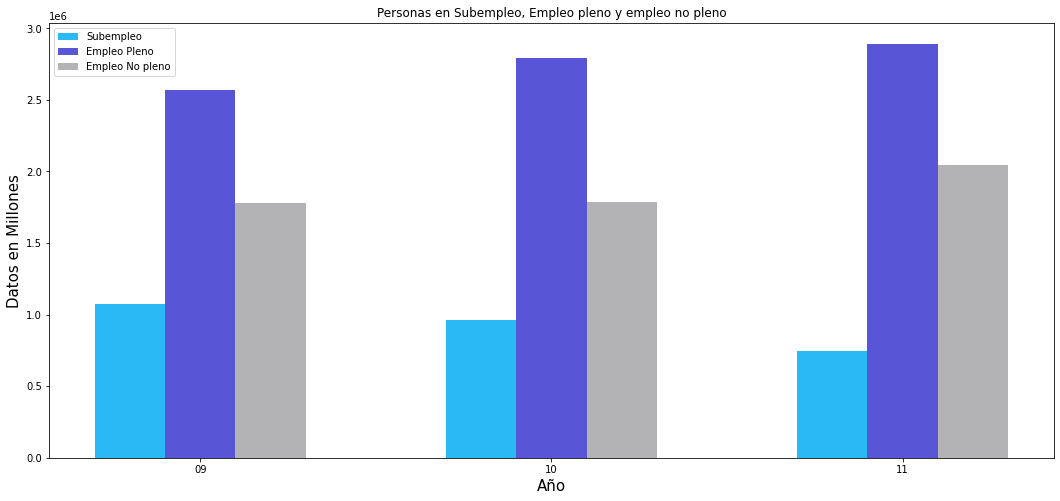

In [826]:
barWidth = 0.2
fig = plt.subplots(figsize =(18, 8))
csv_sub_empleo = csv_sub_empleo.loc[(csv_sub_empleo['Periodo']>=init) & (csv_sub_empleo['Periodo']<=end)]
csv_empleo_pleno = csv_empleo_pleno.loc[(csv_empleo_pleno['Periodo']>=init) & (csv_empleo_pleno['Periodo']<=end)]
csv_empleo_nopleno = csv_empleo_nopleno.loc[(csv_empleo_nopleno['Periodo']>=init) & (csv_empleo_nopleno['Periodo']<=end)]
sub_empleo = np.array(csv_sub_empleo["Total"])
empleo_pleno = np.array(csv_empleo_pleno["Total"])
empleo_no_pleno = np.array(csv_empleo_nopleno["Total"])

# Set position of bar on X axis
br1 = np.arange(len(sub_empleo))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, sub_empleo, color ='#29baf6', width = barWidth, label ='Subempleo')
plt.bar(br2, empleo_pleno, color ='#5856d6', width = barWidth, label ='Empleo Pleno')
plt.bar(br3, empleo_no_pleno, color ='#b3b3b5', width = barWidth, label ='Empleo No pleno')

# Adding Xticks
plt.xlabel('Año', fontsize = 15)
plt.ylabel('Datos en Millones', fontsize = 15)
plt.title('Personas en Subempleo, Empleo pleno y empleo no pleno')
plt.xticks([r + barWidth for r in range(len(sub_empleo))],
        np.array(csv_empleo_nopleno["Periodo"]))

plt.legend()
plt.show()